In [1]:
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [2]:
class ShallowCNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (width,height, depth)
            
        # first CONV => RELU       
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        
        # first CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        
        # first (and only) set of FC => RELU => Dropout layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        # return the constructed network architecture
        return model
    

In [3]:
print("[INFO] loading CIFAR10 data")

((trainX,trainY),(testX,testY))=cifar10.load_data()

trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0                    

print(trainX.shape)
print(testX.shape)

np.random.seed(123)

[INFO] loading CIFAR10 data
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, 10)
Y_test = np_utils.to_categorical(testY, 10)

labelNames=["airplane","automobile","bird","cat","deer","dog",
            "frog","horse","ship","truck"]


In [5]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 10, momentum=0.9, nesterov=True)
model = ShallowCNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
nb_epoch=10
no_epochs=nb_epoch

[INFO] compiling model...


In [6]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, Y_train, validation_data=(testX, Y_test),batch_size=64, 
              epochs=no_epochs,verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 124s - loss: 1.6188 - acc: 0.4146 - val_loss: 1.3038 - val_acc: 0.5407
Epoch 2/10
50000/50000 [==============================] - 124s - loss: 1.2320 - acc: 0.5598 - val_loss: 1.0997 - val_acc: 0.6093
Epoch 3/10
50000/50000 [==============================] - 126s - loss: 1.0744 - acc: 0.6204 - val_loss: 1.0247 - val_acc: 0.6414
Epoch 4/10
50000/50000 [==============================] - 125s - loss: 0.9699 - acc: 0.6563 - val_loss: 0.9748 - val_acc: 0.6617
Epoch 5/10
50000/50000 [==============================] - 127s - loss: 0.8892 - acc: 0.6876 - val_loss: 0.9259 - val_acc: 0.6754
Epoch 6/10
50000/50000 [==============================] - 126s - loss: 0.8248 - acc: 0.7087 - val_loss: 0.9064 - val_acc: 0.6824
Epoch 7/10
50000/50000 [==============================] - 125s - loss: 0.7645 - acc: 0.7337 - val_loss: 0.8795 - val_acc: 0.6929
Epoch 8/10
50000/500

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))



[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       1.00      0.11      0.20     10000
 automobile       0.00      0.00      0.00         0
       bird       0.00      0.00      0.00         0
        cat       0.00      0.00      0.00         0
       deer       0.00      0.00      0.00         0
        dog       0.00      0.00      0.00         0
       frog       0.00      0.00      0.00         0
      horse       0.00      0.00      0.00         0
       ship       0.00      0.00      0.00         0
      truck       0.00      0.00      0.00         0

avg / total       1.00      0.11      0.20     10000



/home/adminpnarayanan/anaconda2/envs/dl4keras/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [8]:
%matplotlib inline

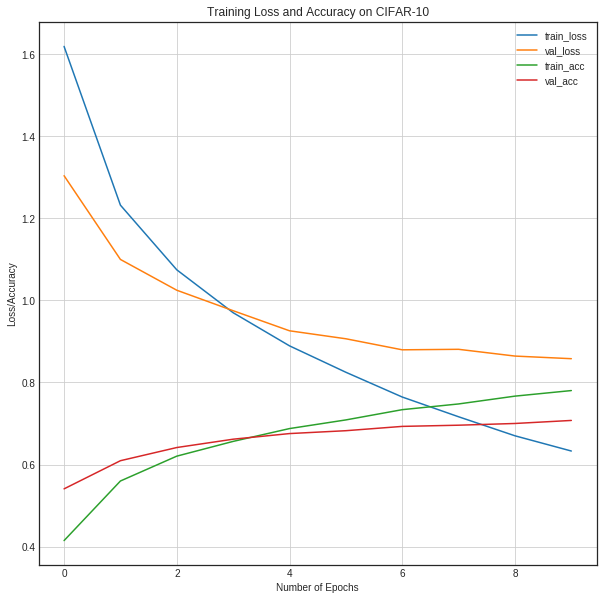

In [15]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.grid(True)
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()


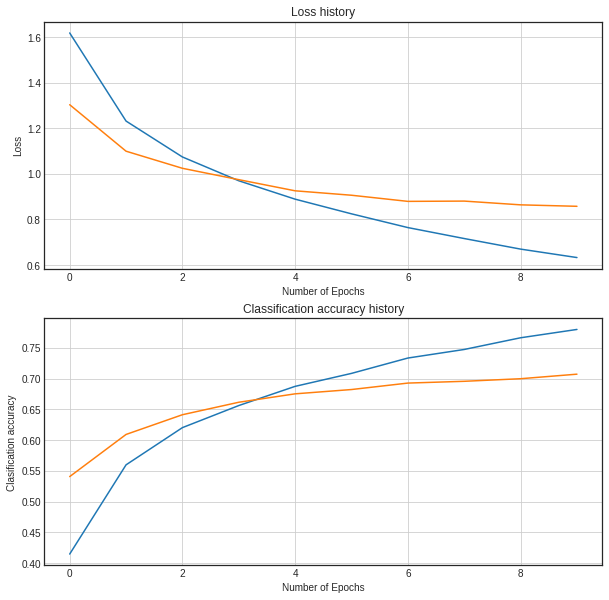

In [16]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.title('Loss history')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.title('Classification accuracy history')
plt.xlabel('Number of Epochs')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.show()
